# 2 ways to calculate polynomial regression

### Abaixo importamos as bibliotecas e extraindo os dados para o nosso exemplo

In [1]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

ticket = 'PETR4.SA'
end = (datetime.now() + timedelta(days=-1)).strftime('%m-%d-%Y')
start = (datetime.now() + timedelta(days=-121)).strftime('%m-%d-%Y')

dataset = web.DataReader(ticket,'yahoo',start,end)
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-18,30.920000,29.040001,30.379999,29.270000,105539200.0,28.316971
2021-02-19,28.490000,27.170000,28.030001,27.330000,215834800.0,26.440138
2021-02-22,23.200001,21.400000,22.799999,21.670000,490230400.0,20.964426
2021-02-23,24.260000,22.709999,23.049999,24.059999,293503100.0,23.276608
2021-02-24,25.000000,24.010000,24.549999,24.400000,155246400.0,23.605537
...,...,...,...,...,...,...
2021-06-09,29.080000,28.520000,28.719999,28.660000,60724200.0,28.660000
2021-06-10,29.030001,28.570000,28.830000,28.680000,35871000.0,28.680000
2021-06-11,28.850000,28.260000,28.799999,28.570000,54894400.0,28.570000


### Método 1 - Utilizando o Numpy


	Absolute Error: 0.42144172741947966
	Root Mean Squered Error: 0.5937778572251163




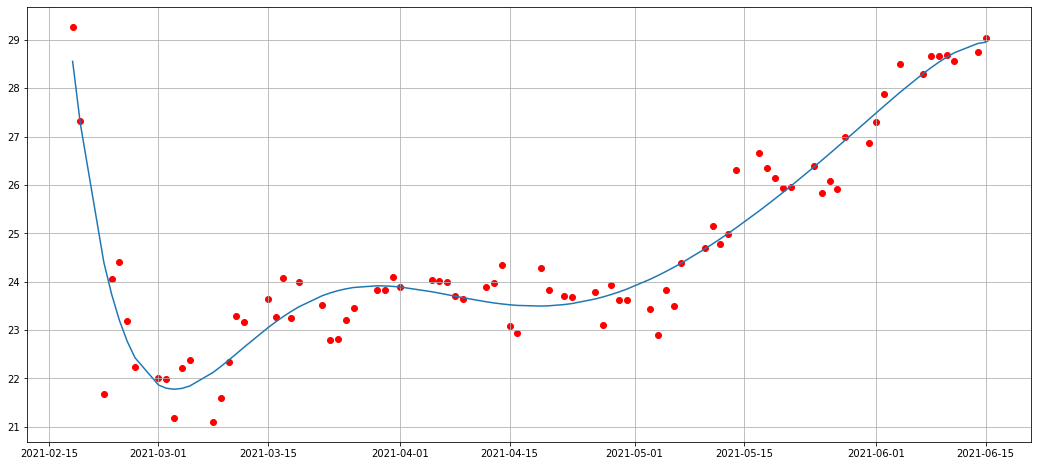

In [4]:
# extraindo os valores para o gráfico scatter
X = dataset.index.values
y = dataset['Close'].values

# para a utilização dos scripts de regressão polinomial da biblioteca numpy
# identificamos que nao é aceito datetime para os eixos
# portanto busquei um scaler para padronizar esses index 

dataset['index'] = dataset.index
x_values = dataset.filter(['index']).values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X2 = scaler.fit_transform(x_values)

# apos o ajuste do scaler reajustei a forma da matriz para usar nos scripts de regressao polinomial
X2 = X2.reshape((1,X.shape[0]))[0]
poly_regress = np.poly1d(np.polyfit(X2,y,7))
y2 = poly_regress(X2)

# apenas como medida de conferência para o overfiting, printamos o rmse e o absolute error 
from sklearn.metrics import mean_squared_error,mean_absolute_error
MAE = mean_absolute_error(y,y2)
RMSE = np.sqrt(mean_squared_error(y,y2))
print('\n\tAbsolute Error: {}\n\tRoot Mean Squered Error: {}\n\n'.format(MAE,RMSE))

# após calcular o y2 referente aos valores da regressão polinomial
# plotei no gráfico os valores encontrados juntamente com os do eixo X (sem o scaller obviamente)
# no gráfico abaixo juntei os valores corretos(scatter) e o polinomio calculado(plot) 
# para facilitar a visualização da acertividade do polinomio

plt.figure(figsize=(18,8))
plt.plot(X,y2)
plt.scatter(X,y, color='red')
plt.grid(True)
plt.show()

### Método 2 - Utilizando o Sklearn

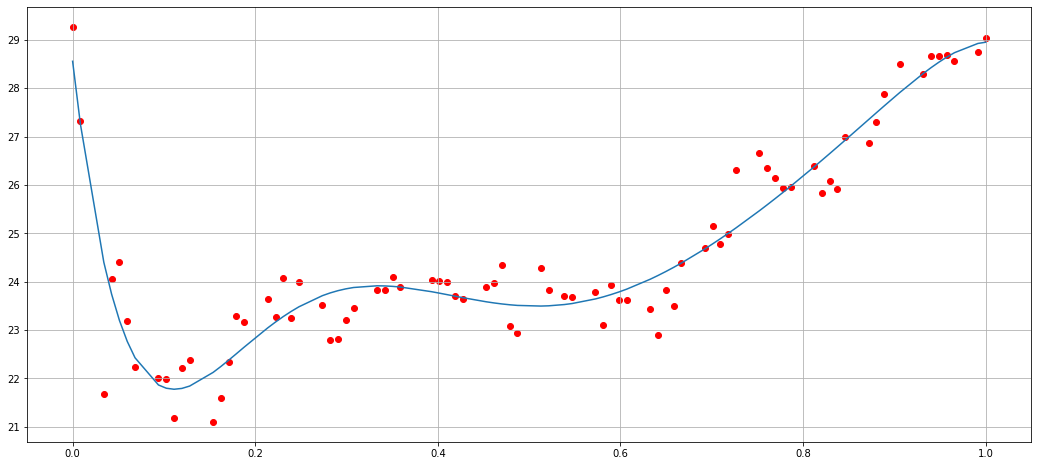

In [13]:
# extraimos os valores x,y
dataset['index'] = dataset.index.values
x_values = dataset.filter(['index']).values
y = dataset['Close'].values

# ajustamos os dados de index com um scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(x_values)

# aplicamos a regressao polinomial e linear juntas
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 7)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# e plotamos o gráfico
plt.figure(figsize=(18,8))
plt.plot(X,lin_reg.predict( poly_reg.fit_transform(X) ))
plt.scatter(X,y, color='red')
plt.grid(True)
plt.show()